# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA:

In [3]:
df.shape

(8425, 23)

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
for i in df.columns:

        print(df[i].value_counts())
        print('__________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
__________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
__________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
__________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
__________________
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2     

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['WindGustDir']=emb.fit_transform(df['WindGustDir'].values.reshape(-1, 1))
df['WindDir9am']=emb.fit_transform(df['WindDir9am'].values.reshape(-1, 1))
df['WindDir3pm']=emb.fit_transform(df['WindDir3pm'].values.reshape(-1, 1))
df['RainToday']=emb.fit_transform(df['RainToday'].values.reshape(-1, 1))
df['RainTomorrow']=emb.fit_transform(df['RainTomorrow'].values.reshape(-1, 1))

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

In [11]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

<AxesSubplot:>

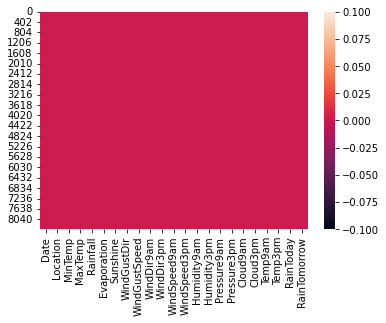

In [12]:
sns.heatmap(df.isnull())

# Data Visualisation:

# Outliers:

<AxesSubplot:>

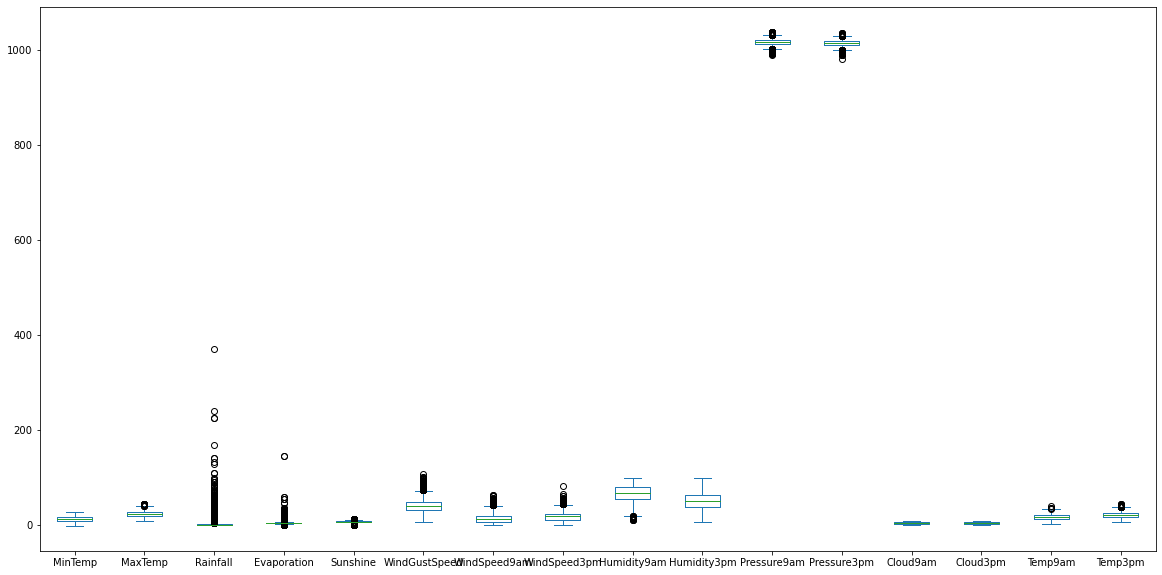

In [13]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

In [16]:
cols = df[['MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
        'Pressure3pm','Temp9am','Temp3pm']]

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [18]:
df.shape

(8425, 23)

In [19]:
df_new.shape

(7987, 23)

In [20]:
Loss = ((8425-7987)/8425)*100
Loss

5.198813056379822

# Skewness:

In [21]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [22]:
sk=["Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","Cloud9am","Cloud3pm"]

In [23]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [24]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

In [25]:
df_new[sk].head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Cloud9am,Cloud3pm
0,0.617396,0.186311,-0.097439,0.433926,0.784361,1.461692,-0.000987
1,-0.693670,0.186311,-0.097439,0.433926,-0.983463,-0.013271,-0.000987
2,-0.693670,0.186311,-0.097439,0.579399,0.700314,-0.013271,-1.082152
3,-0.693670,0.186311,-0.097439,-1.257142,-0.063397,-0.013271,-0.000987
4,0.975076,0.186311,-0.097439,0.209370,-0.541317,1.025084,1.559044


# Encoding:

In [26]:
from sklearn.preprocessing import LabelEncoder as LE

In [27]:
cols =['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]=df_new[cols].apply(LE.fit_transform)

In [29]:
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.617396,0.186311,-0.097439,13,0.433926,13,...,71.0,22.0,1007.7,1007.1,1.461692,-0.000987,16.9,21.8,0,0
1,1,1,7.4,25.1,-0.693670,0.186311,-0.097439,14,0.433926,6,...,44.0,25.0,1010.6,1007.8,-0.013271,-0.000987,17.2,24.3,0,0
2,2,1,12.9,25.7,-0.693670,0.186311,-0.097439,15,0.579399,13,...,38.0,30.0,1007.6,1008.7,-0.013271,-1.082152,21.0,23.2,0,0
3,3,1,9.2,28.0,-0.693670,0.186311,-0.097439,4,-1.257142,9,...,45.0,16.0,1017.6,1012.8,-0.013271,-0.000987,18.1,26.5,0,0
4,4,1,17.5,32.3,0.975076,0.186311,-0.097439,13,0.209370,1,...,82.0,33.0,1010.8,1006.0,1.025084,1.559044,17.8,29.7,0,0


# Correlation:

In [30]:
df_new.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.465769,0.012391,0.103263,0.022366,0.131720,0.026397,-0.094026,-0.021264,-0.034627,...,0.093105,-0.038347,0.038821,0.019223,0.002810,-0.002933,0.067901,0.116206,-0.008830,-0.003565
Location,0.465769,1.000000,0.116694,0.063798,0.025575,0.131179,0.039174,-0.037707,0.256665,-0.041030,...,0.003725,0.059978,-0.024265,-0.012288,0.042821,0.027994,0.118100,0.060707,0.002934,0.009222
MinTemp,0.012391,0.116694,1.000000,0.718598,0.077213,0.372252,0.087866,-0.154935,0.248262,-0.045231,...,-0.126383,0.090208,-0.433113,-0.427936,0.090758,0.038089,0.888690,0.687570,0.061728,0.091021
MaxTemp,0.103263,0.063798,0.718598,1.000000,-0.237227,0.472324,0.403083,-0.237955,0.150891,-0.217160,...,-0.382687,-0.409560,-0.333569,-0.414358,-0.252679,-0.248031,0.864864,0.974957,-0.219747,-0.149708
Rainfall,0.022366,0.025575,0.077213,-0.237227,1.000000,-0.197771,-0.266915,0.142840,0.095747,0.157531,...,0.401551,0.378034,-0.125495,-0.044327,0.306443,0.263781,-0.103803,-0.248837,0.875795,0.316060
Evaporation,0.131720,0.131179,0.372252,0.472324,-0.197771,1.000000,0.389848,-0.121155,0.184559,-0.109834,...,-0.315357,-0.227184,-0.263061,-0.277819,-0.110760,-0.143903,0.440687,0.458644,-0.167131,-0.090305
Sunshine,0.026397,0.039174,0.087866,0.403083,-0.266915,0.389848,1.000000,-0.112272,0.031188,-0.082335,...,-0.392096,-0.439592,-0.012336,-0.074037,-0.543092,-0.554378,0.285620,0.418462,-0.223070,-0.315207
WindGustDir,-0.094026,-0.037707,-0.154935,-0.237955,0.142840,-0.121155,-0.112272,1.000000,0.001046,0.405681,...,0.031081,0.051061,-0.095047,-0.008263,0.120456,0.092271,-0.185080,-0.249791,0.121709,0.044378
WindGustSpeed,-0.021264,0.256665,0.248262,0.150891,0.095747,0.184559,0.031188,0.001046,1.000000,-0.065546,...,-0.274938,-0.087182,-0.373717,-0.331655,0.009189,0.060959,0.219017,0.116454,0.076276,0.172749
WindDir9am,-0.034627,-0.041030,-0.045231,-0.217160,0.157531,-0.109834,-0.082335,0.405681,-0.065546,1.000000,...,0.009571,0.117910,-0.003943,0.081400,0.090988,0.062043,-0.101576,-0.224390,0.149239,0.027091


<AxesSubplot:>

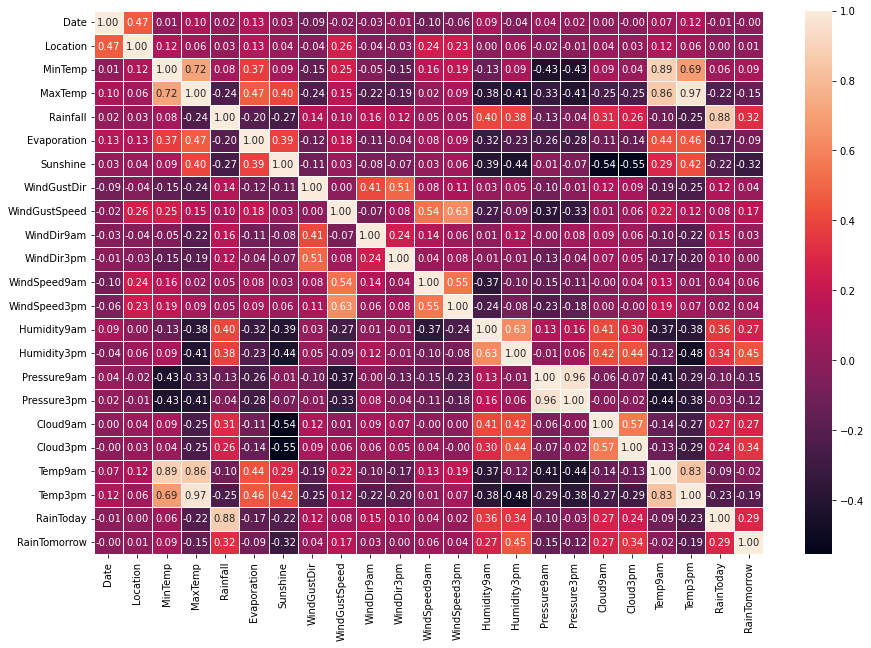

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

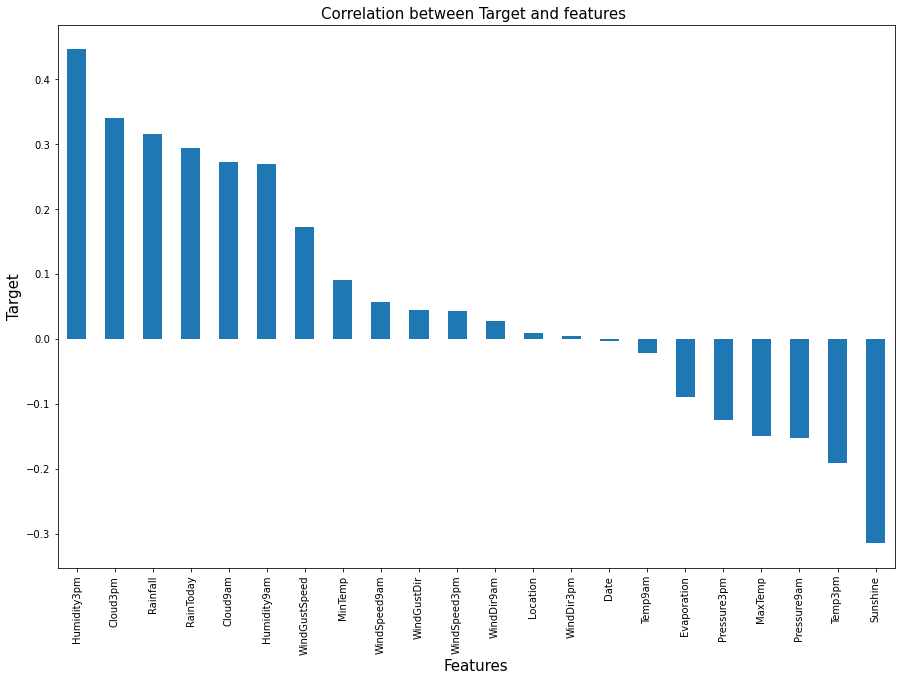

In [34]:
plt.figure(figsize=(15,10))
df_new.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

# Seperating the columns into features and target as X and Y:

In [35]:
x = df_new.drop('RainTomorrow',axis=1)
y= df_new['RainTomorrow']

In [36]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

# Balancing the Data: 

In [37]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [38]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

# Scaling:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.517247,-1.514195,0.000179,-0.044292,0.386012,0.265532,0.111362,1.296684,0.341524,1.307476,...,0.626828,0.002707,-1.835309,-1.623400,-1.346484,1.351784,-0.222608,-0.122207,0.028522,-0.576039
1,-1.516060,-1.514195,-1.142015,0.329040,-0.883373,0.265532,0.111362,1.521745,0.341524,-0.286899,...,0.409208,-1.681396,-1.675281,-1.129081,-1.226138,-0.192659,-0.222608,-0.067035,0.463064,-0.576039
2,-1.514873,-1.514195,-0.095004,0.430858,-0.883373,0.265532,0.111362,1.746806,0.489185,1.307476,...,0.844449,-2.055641,-1.408568,-1.640445,-1.071408,-0.192659,-1.347897,0.631808,0.271866,-0.576039
3,-1.513686,-1.514195,-0.799357,0.821160,-0.883373,0.265532,0.111362,-0.728866,-1.374982,0.396405,...,-1.005326,-1.619022,-2.155364,0.064102,-0.366525,-0.192659,-0.222608,0.098481,0.845461,-0.576039
4,-1.512499,-1.514195,0.780679,1.550855,0.732321,0.265532,0.111362,1.296684,0.113590,-1.425738,...,0.191587,0.688823,-1.248541,-1.094990,-1.535599,0.894609,1.401091,0.043309,1.401675,-0.576039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.942438,1.371038,-1.181694,-0.885128,-0.334710,0.265532,0.111362,0.846562,1.166161,1.535244,...,-0.588436,-0.212973,0.448266,0.532628,0.509578,-0.192659,1.315516,-1.106746,-1.461402,-0.576039
12326,-0.497738,-0.231869,-1.884442,-1.452773,-0.883373,-1.687678,-1.219866,1.521745,-0.203694,1.535244,...,-0.787705,0.376952,-0.501745,0.524330,0.011705,0.894609,0.932054,-1.924485,-1.379394,-0.576039
12327,-0.127439,-0.552450,2.133310,1.289208,1.295425,-1.029587,-1.553833,1.521745,1.365839,1.307476,...,0.090971,0.333367,0.901230,-1.769822,-1.829884,0.860607,1.295954,2.234946,1.243566,-0.576039
12328,1.549588,1.371038,-0.029320,-0.676081,1.454883,0.265532,0.111362,-0.953927,0.905289,-1.425738,...,0.011011,1.444170,1.341789,-0.528169,-0.984290,0.919736,1.226056,-0.205681,-0.567417,1.735993


# VIF:

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.524529,Date
1,1.574636,Location
2,9.540935,MinTemp
3,24.817976,MaxTemp
4,3.343605,Rainfall
5,1.564263,Evaporation
6,2.031582,Sunshine
7,1.577034,WindGustDir
8,2.211521,WindGustSpeed
9,1.389939,WindDir9am


In [41]:
x.drop('Temp3pm',axis=1,inplace=True)

In [42]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.523476,Date
1,1.570217,Location
2,9.470943,MinTemp
3,10.063122,MaxTemp
4,3.343318,Rainfall
5,1.563883,Evaporation
6,2.031530,Sunshine
7,1.574221,WindGustDir
8,2.197391,WindGustSpeed
9,1.388606,WindDir9am


In [43]:
x.drop('Pressure9am',axis=1,inplace=True)

In [44]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.520211,Date
1,1.569780,Location
2,9.357953,MinTemp
3,9.760164,MaxTemp
4,3.307503,Rainfall
5,1.541924,Evaporation
6,2.021490,Sunshine
7,1.562531,WindGustDir
8,2.178223,WindGustSpeed
9,1.364250,WindDir9am


In [45]:
x.drop('Temp9am',axis=1,inplace=True)

In [46]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.490991,Date
1,1.568463,Location
2,4.642933,MinTemp
3,5.749985,MaxTemp
4,3.306681,Rainfall
5,1.538557,Evaporation
6,2.011948,Sunshine
7,1.561043,WindGustDir
8,2.144550,WindGustSpeed
9,1.363791,WindDir9am


In [47]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Finding Best Random State:

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8929440389294404  on Random_state  163


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

# Decision Tree Classifier:

In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.8921330089213301
Confusion Matrix is  
 [[1109  130]
 [ 136 1091]]
Classification Report is  
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1239
           1       0.89      0.89      0.89      1227

    accuracy                           0.89      2466
   macro avg       0.89      0.89      0.89      2466
weighted avg       0.89      0.89      0.89      2466



# Random Forest Classifier:

In [52]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.9347120843471208
Confusion_Matrix is  [[1161   78]
 [  83 1144]]
Classification_Report is  
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1239
           1       0.94      0.93      0.93      1227

    accuracy                           0.93      2466
   macro avg       0.93      0.93      0.93      2466
weighted avg       0.93      0.93      0.93      2466



# KNeighbors Classifier:

In [53]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8669910786699108
[[ 981  258]
 [  70 1157]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1239
           1       0.82      0.94      0.88      1227

    accuracy                           0.87      2466
   macro avg       0.88      0.87      0.87      2466
weighted avg       0.88      0.87      0.87      2466



# Cross Validation:

In [55]:
from sklearn.model_selection import cross_val_score
for i in range(2,20):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  60.77047850770478
at cv=  3
cross val score =  66.89375506893755
at cv=  4
cross val score =  67.37348142026894
at cv=  5
cross val score =  74.29034874290348
at cv=  6
cross val score =  67.51013787510138
at cv=  7
cross val score =  76.08499821410271
at cv=  8
cross val score =  76.90396772692114
at cv=  9
cross val score =  78.1346309813463
at cv=  10
cross val score =  81.35442011354421
at cv=  11
cross val score =  80.48680300520175
at cv=  12
cross val score =  82.62232624457418
at cv=  13
cross val score =  82.35527138869766
at cv=  14
cross val score =  82.70906732314224
at cv=  15
cross val score =  83.89294403892946
at cv=  16
cross val score =  83.72398596863577
at cv=  17
cross val score =  82.09795539760503
at cv=  18
cross val score =  81.88969991889701
at cv=  19
cross val score =  84.37146767506567


In [56]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(DTC,x,y,cv=19).mean())

0.8432257203815336


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(,x,y,cv=).mean())